In [94]:
pip install -q pandas matplotlib seaborn

In [95]:
from google.colab import files
uploaded = files.upload()

Saving vgchartz-2024.csv to vgchartz-2024 (1).csv


In [96]:
import pandas as pd

In [97]:
# Load the dataset
df = pd.read_csv(next(iter(uploaded)))

In [98]:
# Initial Exploration
# Remove img column
df.drop(df.columns[0], axis=1, inplace=True)

# Display the first few rows
print(df.head())

# Check the columns and data types
print(df.info())

# Check for any missing values
print(df.isnull().sum())


                         title console    genre       publisher  \
0           Grand Theft Auto V     PS3   Action  Rockstar Games   
1           Grand Theft Auto V     PS4   Action  Rockstar Games   
2  Grand Theft Auto: Vice City     PS2   Action  Rockstar Games   
3           Grand Theft Auto V    X360   Action  Rockstar Games   
4    Call of Duty: Black Ops 3     PS4  Shooter      Activision   

        developer  critic_score  total_sales  na_sales  jp_sales  pal_sales  \
0  Rockstar North           9.4        20.32      6.37      0.99       9.85   
1  Rockstar North           9.7        19.39      6.06      0.60       9.71   
2  Rockstar North           9.6        16.15      8.41      0.47       5.49   
3  Rockstar North           NaN        15.86      9.06      0.06       5.33   
4        Treyarch           8.1        15.09      6.18      0.41       6.05   

   other_sales release_date last_update  
0         3.12   2013-09-17         NaN  
1         3.02   2014-11-18  2018-01-0

In [99]:
# Summary
# Get a summary of numerical columns
print(df.describe())


       critic_score   total_sales      na_sales     jp_sales     pal_sales  \
count   6678.000000  18922.000000  12637.000000  6726.000000  12824.000000   
mean       7.220440      0.349113      0.264740     0.102281      0.149472   
std        1.457066      0.807462      0.494787     0.168811      0.392653   
min        1.000000      0.000000      0.000000     0.000000      0.000000   
25%        6.400000      0.030000      0.050000     0.020000      0.010000   
50%        7.500000      0.120000      0.120000     0.040000      0.040000   
75%        8.300000      0.340000      0.280000     0.120000      0.140000   
max       10.000000     20.320000      9.760000     2.130000      9.850000   

        other_sales  
count  15128.000000  
mean       0.043041  
std        0.126643  
min        0.000000  
25%        0.000000  
50%        0.010000  
75%        0.030000  
max        3.120000  


In [100]:
# Handle missing values
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.head())

title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
last_update     0
dtype: int64
                        title console             genre       publisher  \
1          Grand Theft Auto V     PS4            Action  Rockstar Games   
4   Call of Duty: Black Ops 3     PS4           Shooter      Activision   
7       Red Dead Redemption 2     PS4  Action-Adventure  Rockstar Games   
8  Call of Duty: Black Ops II    X360           Shooter      Activision   
9  Call of Duty: Black Ops II     PS3           Shooter      Activision   

        developer  critic_score  total_sales  na_sales  jp_sales  pal_sales  \
1  Rockstar North           9.7        19.39      6.06      0.60       9.71   
4        Treyarch           8.1        15.09      6.18      0.41       6.05   
7  Rockstar Games           9.8        13.94      5.26      0.21 

In [101]:
# Add new columns needed for further analysis
year = [year[:4] for year in df['release_date']]
df.loc[:, 'release_year'] = year



In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 1 to 15044
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         282 non-null    object 
 1   console       282 non-null    object 
 2   genre         282 non-null    object 
 3   publisher     282 non-null    object 
 4   developer     282 non-null    object 
 5   critic_score  282 non-null    float64
 6   total_sales   282 non-null    float64
 7   na_sales      282 non-null    float64
 8   jp_sales      282 non-null    float64
 9   pal_sales     282 non-null    float64
 10  other_sales   282 non-null    float64
 11  release_date  282 non-null    object 
 12  last_update   282 non-null    object 
 13  release_year  282 non-null    object 
dtypes: float64(6), object(8)
memory usage: 33.0+ KB


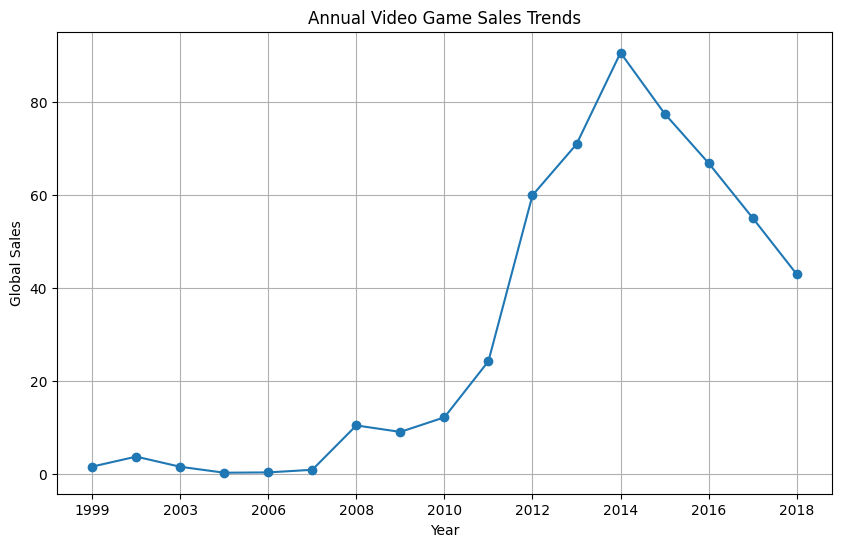

In [104]:
# Sales trend over time (line chart)
annual_sales = df.groupby('release_year')['total_sales'].sum()
plt.figure(figsize=(10, 6))
annual_sales.plot(kind='line', marker='o')
plt.title('Annual Video Game Sales Trends')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.grid()
plt.show()

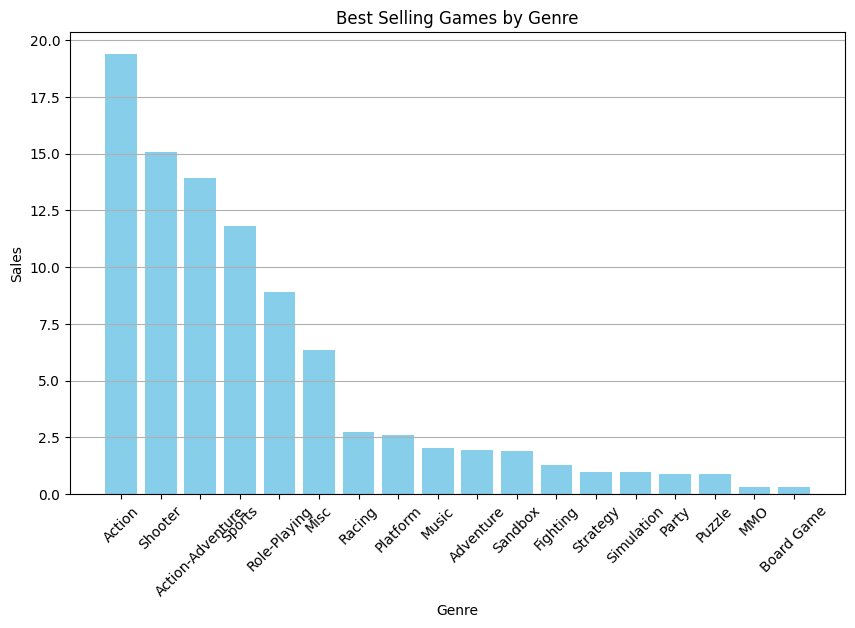

In [105]:
# Bestselling games by genre (bar chart)
plt.figure(figsize=(10, 6))
plt.bar(df['genre'], df['total_sales'], color='skyblue')
plt.title('Best Selling Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y')  # Adding grid lines for better readability
plt.show()

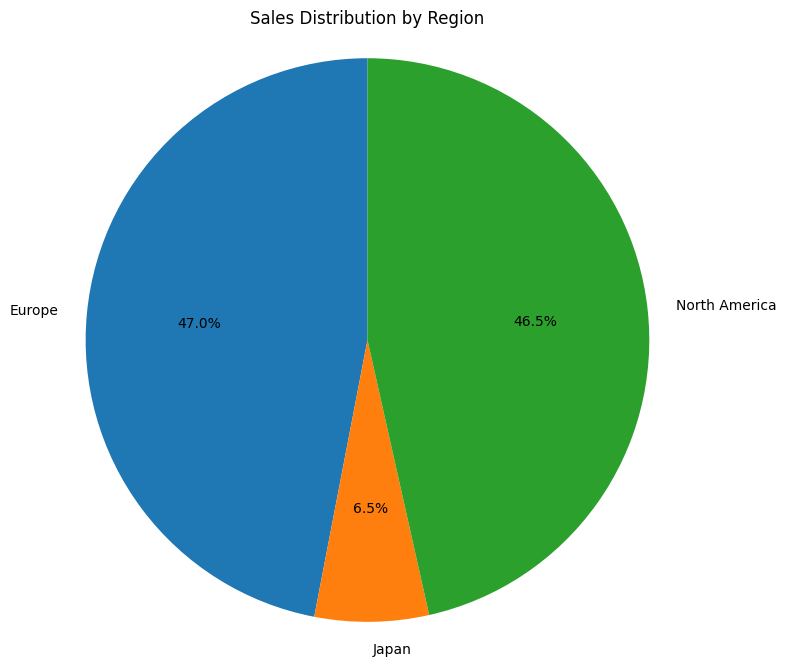

In [106]:
# Sales by region (pie chart)
data = {
    'Region': ['Japan', 'North America', 'Europe'],
    'Sales': [df['jp_sales'].sum(), df['na_sales'].sum(), df['pal_sales'].sum()]
}
df2 = pd.DataFrame(data)
region_sales = df2.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

['Action' 'Action-Adventure' 'Adventure' 'Board Game' 'Fighting' 'MMO'
 'Misc' 'Music' 'Party' 'Platform' 'Puzzle' 'Racing' 'Role-Playing'
 'Sandbox' 'Shooter' 'Simulation' 'Sports' 'Strategy']


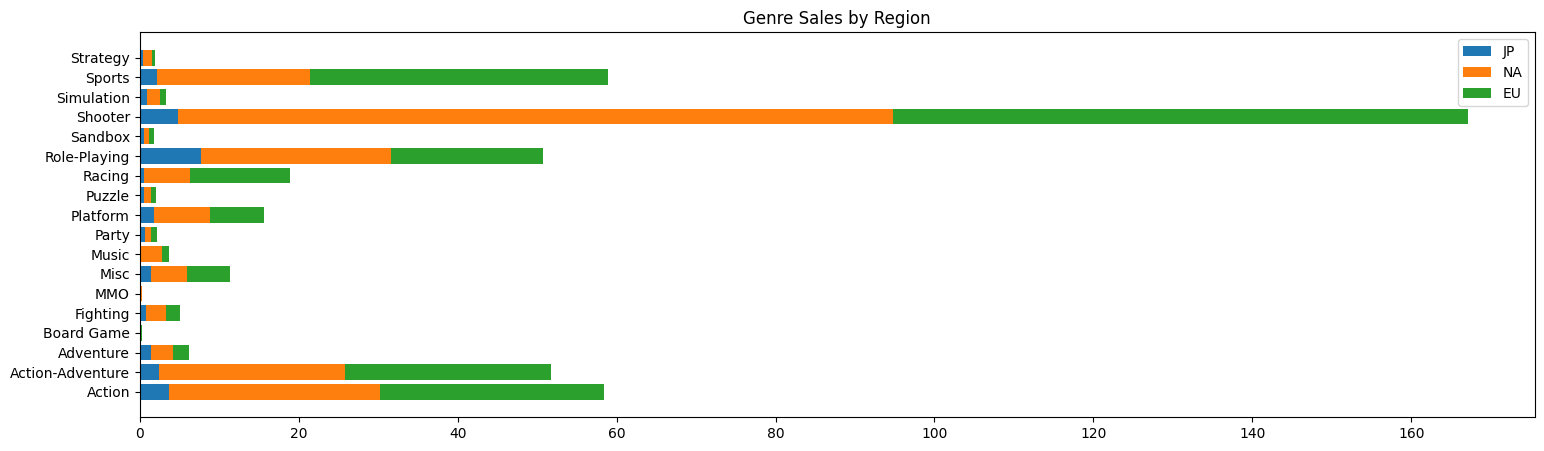

In [107]:
# Genre Sales by Region (Stacked Chart)
unique_genre = df['genre'].unique()
unique_genre.sort()
print(unique_genre)
jp_sales = df.groupby('genre')['jp_sales'].sum().to_list()
na_sales = df.groupby('genre')['na_sales'].sum().to_list()
eu_sales = df.groupby('genre')['pal_sales'].sum().to_list()

data = {
    'Genre': unique_genre,
    'Japan': jp_sales,
    'North America': na_sales,
    'Europe': eu_sales
}
df2 = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(18,5))
ax.set_title('Genre Sales by Region')
ax.barh(df2['Genre'], df2['Japan'], label='JP')
ax.barh(df2['Genre'], df2['North America'], label='NA', left=df2['Japan'])
ax.barh(df2['Genre'], df2['Europe'], label='EU', left=df2['Japan']+df2['North America'])
ax.legend(loc="upper right")